## Preprocessing of the Harvard Data Set

In [55]:
#importation of libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [ ]:

# Definir rutas
base_path = r'c:\Users\jakif\CODE\PROYECTO-FINAL\images\harvard_dataset'
metadata_path = os.path.join(base_path, 'HAM10000_metadata')
images_part_1_path = os.path.join(base_path, 'HAM10000_images_part_1')
images_part_2_path = os.path.join(base_path, 'HAM10000_images_part_2')


In [57]:
#imprimir las 5 primeras fials
metadata = pd.read_csv(metadata_path)
print(metadata.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern  


In [61]:
#mostrar 5 primeras imagenes
images_part_1 = os.listdir(images_part_1_path)
print(images_part_1[-5:])
images_part_2 = os.listdir(images_part_2_path)
print(images_part_2[-5:])

['ISIC_0029301.jpg', 'ISIC_0029302.jpg', 'ISIC_0029303.jpg', 'ISIC_0029304.jpg', 'ISIC_0029305.jpg']
['ISIC_0034316.jpg', 'ISIC_0034317.jpg', 'ISIC_0034318.jpg', 'ISIC_0034319.jpg', 'ISIC_0034320.jpg']


In [62]:
print("numero de imagenes en la carpeta 1: ", len(images_part_1))
print("numero de imagenes en la carpeta 2: ", len(images_part_2))

numero de imagenes en la carpeta 1:  5000
numero de imagenes en la carpeta 2:  5015


In [ ]:
# train_images = []
# for i in range(5):
#     img_path = os.path.join(images_part_1_path, images_part_1[i])
#     img = Image.open(img_path)  # Corrected to open the actual image file
#     train_images.append(np.array(img))

# # Mostrar las primeras 5 imágenes
# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     plt.imshow(train_images[i])  # Corrected to display the loaded image arrays
#     plt.axis('off')
# plt.show()

For facilitate the preprocess of data we have merged the files into one

In [ ]:
# #unir en una misma carpeta las imagenes de las dos partes
# # Definir la ruta de la carpeta de destino
# destination_folder = os.path.join(base_path, 'merged_images_part1_part2')
# # Copiar las imágenes de la primera parte
# for filename in os.listdir(images_part_1_path):
#     src = os.path.join(images_part_1_path, filename)
#     dst = os.path.join(destination_folder, filename)
#     if os.path.isfile(src):
#         os.rename(src, dst)  # Move the file to the new location
# # Copiar las imágenes de la segunda parte
# for filename in os.listdir(images_part_2_path):
#     src = os.path.join(images_part_2_path, filename)
#     dst = os.path.join(destination_folder, filename)
#     if os.path.isfile(src):
#         os.rename(src, dst)  # Move the file to the new location

# #tamaño de la carpeta
# print("Total images on the folder: ", len(os.listdir(destination_folder)))

Total images on the folder:  10015


clear dataset:

akiec: Actinic keratoses (premaligno)

bcc: Basal cell carcinoma (maligno, pero no melanoma)

bkl: Benign keratosis (benigno)

df: Dermatofibroma (benigno)

mel: Melanoma maligno (clase objetivo)

nv: Melanocytic nevi (benigno) (clase objetivo)

vasc: Vascular lesions (benigno)

In [ ]:
#count the number of images in the merged folder
diagnosis_counts = metadata['dx'].value_counts()

In [65]:
print(diagnosis_counts)

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


we can see that is very unbalanced between nv and mel. We can try to do augmentation of data 


In [66]:
#detectar dx (mel) guardar image_id

mel_images = metadata[metadata['dx'] == 'mel']['image_id'].tolist()
print("Total images with diagnosis 'mel':", len(mel_images))
# Display the first 5 image IDs with diagnosis 'mel'
print("First 5 image IDs with diagnosis 'mel':", mel_images[:5])

Total images with diagnosis 'mel': 1113
First 5 image IDs with diagnosis 'mel': ['ISIC_0025964', 'ISIC_0030623', 'ISIC_0027190', 'ISIC_0031023', 'ISIC_0028086']


In [67]:
images_merged_path = os.path.join(base_path, 'merged_images_part1_part2')

In [68]:
images_merged = os.listdir(images_merged_path)
print(images_merged[:5])
print(images_merged[-5:])

['ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg']
['ISIC_0034316.jpg', 'ISIC_0034317.jpg', 'ISIC_0034318.jpg', 'ISIC_0034319.jpg', 'ISIC_0034320.jpg']


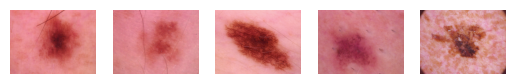

In [69]:
train_images = []
for i in range(5):
    img_path = os.path.join(images_merged_path, images_merged[i])
    img = Image.open(img_path)  # Corrected to open the actual image file
    train_images.append(np.array(img))

#Mostrar las primeras 5 imágenes
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i])  # Corrected to display the loaded image arrays
    plt.axis('off')
plt.show()


In [70]:
#dividir en carpetas benignas(nv) y malignas(mel)
benign_images = metadata[metadata['dx'] == 'nv']['image_id'].tolist()
malignant_images = metadata[metadata['dx'] == 'mel']['image_id'].tolist()
#añadir .jpg a los nombres de las imagenes
benign_images = [img + '.jpg' for img in benign_images]
malignant_images = [img + '.jpg' for img in malignant_images]

#seleccionar imagenes benignas y malignas de la carpeta merged_images_part1_part2
benign_images_path = os.path.join(base_path, 'benign_images')
malignant_images_path = os.path.join(base_path, 'malignant_images')

# Copiar imágenes benignas
for img in benign_images:
    src = os.path.join(images_merged_path, img)
    dst = os.path.join(benign_images_path, img)
    if os.path.isfile(src):
        os.rename(src, dst)  # Move the file to the new location
# Copiar imágenes malignas
for img in malignant_images:
    src = os.path.join(images_merged_path, img)
    dst = os.path.join(malignant_images_path, img)
    if os.path.isfile(src):
        os.rename(src, dst)  # Move the file to the new location

In [71]:
#contar el numero de imagenes benignas y malignas
benign_count = len(os.listdir(benign_images_path))
malignant_count = len(os.listdir(malignant_images_path))
print("Total benign images:", benign_count)
print("Total malignant images:", malignant_count)

Total benign images: 6705
Total malignant images: 1113


In [72]:
#eliminar filas que no sean dx = nv o mel 
metadata_clear = metadata[metadata['dx'].isin(['nv', 'mel'])]
#crear un csv nuevo con las imagenes benignas y malignas
metadata_clear.to_csv(os.path.join(base_path, 'metadata_clear.csv'), index=False)